In [15]:
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

# Pfad relativ zum Notebook-Ordner (aktuelles Working Directory)
excel_path = Path.cwd() / "Auswertung_Studie.xlsx"

# (Optional) check: existiert die Datei?
print("Gefunden:", excel_path.exists(), "-", excel_path)

# Sheets ansehen
xls = pd.ExcelFile(excel_path)
print("Sheets:", xls.sheet_names)

df_final = pd.read_excel(excel_path, sheet_name="Final", header=[0, 1])


def flatten_cols(cols):
    out = []
    for a, b in cols:
        a = "" if "Unnamed" in str(a) else str(a).strip()
        b = "" if "Unnamed" in str(b) else str(b).strip()
        name = "_".join([x for x in (a, b) if x])
        out.append(name)
    return out

df_final_flat = df_final.copy()
df_final_flat.columns = flatten_cols(df_final_flat.columns)

df_final_flat.head(25)


Gefunden: True - c:\Users\mweiler\Documents\GitHub\MMI_Tool\Auswertung_Studie.xlsx
Sheets: ['FirstTry', 'Final']


,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Alter,Geschlecht_weiblich,Geschlecht_männlich,Größe,Beininnenlänge,Sitzhöhe,...,Nutzung Methode_Einstellung durch Laden / Mechaniker,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Gefühl Sitzposition_Deutlich schlechter,Gefühl Sitzposition_Etwas schlechter,Gefühl Sitzposition_Kein Unterschied,Gefühl Sitzposition_Etwas besser,Gefühl Sitzposition_Deutlich besser,Längerer Zeitraum,Veränderungsimpuls
0,25,00:00:35.910000,67.7,157.3,27.0,x,NaN,164,75.5,70.0,...,NaN,x,NaN,NaN,x,NaN,NaN,NaN,7,1
1,24,00:00:57.040000,68.2,143.1,26.0,NaN,x,200,92.0,80.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,8,1
2,23,00:01:10.400000,75.4,150.6,23.0,x,NaN,166,79.6,63.5,...,NaN,x,x,NaN,x,NaN,NaN,NaN,2,9
3,22,00:01:15.850000,72.4,161.0,23.0,x,NaN,172,82.9,71.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,9,1
4,21,00:02:19.390000,76.2,160.7,26.0,x,NaN,178,87.0,76.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,10,0
5,20,00:01:39.560000,86.4,148.6,26.0,NaN,x,193,92.0,77.0,...,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,10,0
6,19,00:01:14.580000,70.8,156.0,21.0,NaN,x,186,88.0,75.5,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,8,2
7,18,00:02:56.150000,76.6,143.2,26.0,NaN,x,194,91.0,75.5,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,8,4
8,17,00:02:17.640000,72.6,144.5,27.0,NaN,x,180,82.0,70.5,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,10,0
9,16,00:01:46.760000,81.3,147.4,23.0,x,NaN,193,88.0,80.5,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,10,0


In [8]:
#Probanden 1-5 rasuschmießen da dort noch Werte fehlen
df = df_final_flat
print(df.columns)
df = df[~df["Proband Nr."].between(1,5)]
df.head(25)


Index(['Proband Nr.', 'Ben. Zeit', 'Kniewinkel 1', 'Kniewinkel 2', 'Alter',
       'Geschlecht_weiblich', 'Geschlecht_männlich', 'Größe', 'Beininnenlänge',
       'Sitzhöhe', 'km/Woche_<20', 'km/Woche_21-40', 'km/Woche_41-60',
       'km/Woche_>60', 'Dauer aktives Radfahren', 'Häufigkeit / Woche',
       'Form der Fahrradnutzung_Reines Fortbewegungsmittel',
       'Form der Fahrradnutzung_Sport / Training',
       'Form der Fahrradnutzung_Beides',
       'Form der Fahrradnutzung_Gelegentlich/Kein regelmäßiges Fahren',
       'Form der Fahrradnutzung_Sonstiges', 'Fahrradtyp_Rennard',
       'Fahrradtyp_Gravelbike', 'Fahrradtyp_Moutainbike',
       'Fahrradtyp_City/Commuter', 'Fahrradtyp_E-Bike', 'Fahrradtyp_Trecking',
       'Fahrradtyp_Crosscountry', 'Fahrradtyp_Sonstige',
       'Professionelles Bikefitting_Ja [Jahr]',
       'Professionelles Bikefitting_Nein', 'Satteleinstellung, wer_Ich selbst',
       'Satteleinstellung, wer_Fahrradladen / Mechaniker',
       'Satteleinstellung, we

,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Alter,Geschlecht_weiblich,Geschlecht_männlich,Größe,Beininnenlänge,Sitzhöhe,...,Nutzung Methode_Einstellung durch Laden / Mechaniker,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Gefühl Sitzposition_Deutlich schlechter,Gefühl Sitzposition_Etwas schlechter,Gefühl Sitzposition_Kein Unterschied,Gefühl Sitzposition_Etwas besser,Gefühl Sitzposition_Deutlich besser,Längerer Zeitraum,Veränderungsimpuls
0,25,00:00:35.910000,67.7,157.3,27.0,x,NaN,164,75.5,70.0,...,NaN,x,NaN,NaN,x,NaN,NaN,NaN,7,1
1,24,00:00:57.040000,68.2,143.1,26.0,NaN,x,200,92.0,80.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,8,1
2,23,00:01:10.400000,75.4,150.6,23.0,x,NaN,166,79.6,63.5,...,NaN,x,x,NaN,x,NaN,NaN,NaN,2,9
3,22,00:01:15.850000,72.4,161.0,23.0,x,NaN,172,82.9,71.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,9,1
4,21,00:02:19.390000,76.2,160.7,26.0,x,NaN,178,87.0,76.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,10,0
5,20,00:01:39.560000,86.4,148.6,26.0,NaN,x,193,92.0,77.0,...,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,10,0
6,19,00:01:14.580000,70.8,156.0,21.0,NaN,x,186,88.0,75.5,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,8,2
7,18,00:02:56.150000,76.6,143.2,26.0,NaN,x,194,91.0,75.5,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,8,4
8,17,00:02:17.640000,72.6,144.5,27.0,NaN,x,180,82.0,70.5,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,10,0
9,16,00:01:46.760000,81.3,147.4,23.0,x,NaN,193,88.0,80.5,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,10,0


In [9]:
#NaN durch 0 ersetzen
df = df.fillna(0)

#x durch 1 ersetzen
df = df.replace({"x":1})

#Zeiten in sekunden umrechnen
df["Ben. Zeit"] = pd.to_timedelta(df["Ben. Zeit"].astype(str), errors="coerce").dt.total_seconds().astype(float)


df.head(20)

C:\Users\mweiler\AppData\Local\Temp\ipykernel_38564\407817858.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\mweiler\AppData\Local\Temp\ipykernel_38564\407817858.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"x":1})


,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Alter,Geschlecht_weiblich,Geschlecht_männlich,Größe,Beininnenlänge,Sitzhöhe,...,Nutzung Methode_Einstellung durch Laden / Mechaniker,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Gefühl Sitzposition_Deutlich schlechter,Gefühl Sitzposition_Etwas schlechter,Gefühl Sitzposition_Kein Unterschied,Gefühl Sitzposition_Etwas besser,Gefühl Sitzposition_Deutlich besser,Längerer Zeitraum,Veränderungsimpuls
0,25,35.91,67.7,157.3,27.0,1,0,164,75.5,70.0,...,0.0,1,0,0.0,1,0,0,0,7,1
1,24,57.04,68.2,143.1,26.0,0,1,200,92.0,80.0,...,0.0,1,0,0.0,0,1,0,0,8,1
2,23,70.40,75.4,150.6,23.0,1,0,166,79.6,63.5,...,0.0,1,1,0.0,1,0,0,0,2,9
3,22,75.85,72.4,161.0,23.0,1,0,172,82.9,71.0,...,0.0,1,0,0.0,0,1,0,0,9,1
4,21,139.39,76.2,160.7,26.0,1,0,178,87.0,76.0,...,0.0,1,0,0.0,0,1,0,0,10,0
5,20,99.56,86.4,148.6,26.0,0,1,193,92.0,77.0,...,0.0,0,0,0.0,0,1,0,0,10,0
6,19,74.58,70.8,156.0,21.0,0,1,186,88.0,75.5,...,0.0,1,0,0.0,0,1,0,0,8,2
7,18,176.15,76.6,143.2,26.0,0,1,194,91.0,75.5,...,0.0,1,0,0.0,0,1,0,0,8,4
8,17,137.64,72.6,144.5,27.0,0,1,180,82.0,70.5,...,0.0,1,0,0.0,0,1,0,0,10,0
9,16,106.76,81.3,147.4,23.0,1,0,193,88.0,80.5,...,0.0,1,0,0.0,0,1,0,0,10,0


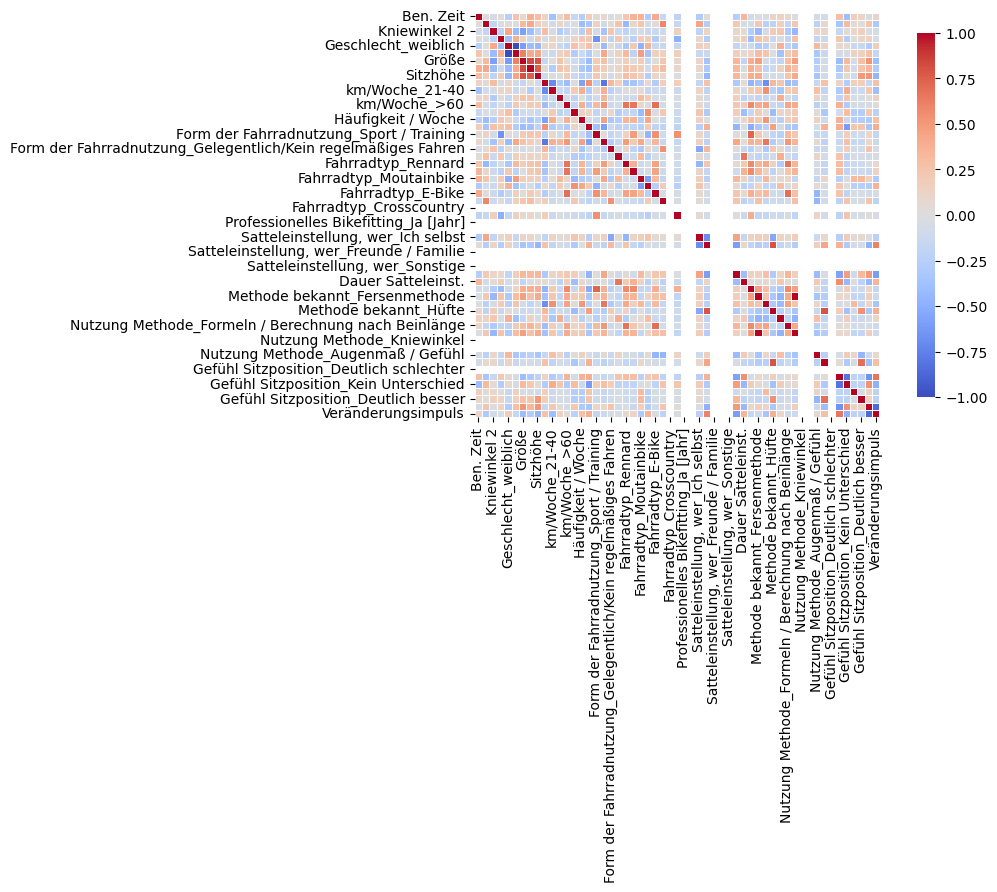

In [20]:
df_no_proband = df.drop(columns=["Proband Nr."])
corr = df_no_proband.corr()

plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    corr,
    annot=False, fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.9}
    
    
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

In [21]:
top = (
    corr.where(np.triu(np.ones_like(corr, dtype=bool), k=1))  # nur oberes Dreieck, ohne Diagonale
        .stack()
        .sort_values(key=lambda s: s.abs(), ascending=False)  # nach Betrag sortieren
)

top.head(20)  # z.B. Top 20

Methode bekannt_Fersenmethode                     Nutzung Methode_Fersenmethode                          1.000000
Geschlecht_weiblich                               Geschlecht_männlich                                   -1.000000
Längerer Zeitraum                                 Veränderungsimpuls                                    -0.861095
Größe                                             Beininnenlänge                                         0.822782
Gefühl Sitzposition_Etwas schlechter              Gefühl Sitzposition_Kein Unterschied                  -0.818182
km/Woche_<20                                      Form der Fahrradnutzung_Beides                        -0.801784
Größe                                             Sitzhöhe                                               0.800494
Satteleinstellung, wer_Fahrradladen / Mechaniker  Methode bekannt_Hüfte                                  0.793492
Methode bekannt_Hüfte                             Nutzung Methode_Hüfte                 